In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import contourpy
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from _FigureJiazeHelper import *
from _DetectabilityWithMeta import *
from _CommunityDetect import *
from EXPERIMENT import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=10)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 10  # 'large'
plt.rcParams['lines.markersize'] = 12
plt.rcParams['axes.linewidth'] = 0.5

# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

In [3]:
X = 2
Z = 1
n = X * Z * 2000  # 4000 nodes
d = 50
Withsnr = False
givenNumGroup = False
DC = False
HelpWithFull = False
LabelPropagate = False
fileId = 'amiExp11.21' + f'_n={n}_X={X}_Z={Z}_d={round(d)}_{"snr" if Withsnr else ""}_' \
                            f'{"givenNumGroup" if givenNumGroup else ""}_' \
                            f'{"DC" if DC else ""}_{"HelpWithFull" if HelpWithFull else ""}_' \
                            f'{"LabelPropagate" if LabelPropagate else ""}'
load_path = "./result/detectabilityWithMeta/" + fileId + ".txt"
plot_rhos, plot_zs, full_ami, sub_ami, snr_nm, snr_m, full_num_group, sub_num_group = read_exp(load_path=load_path, Withsnr=Withsnr, givenNumGroup=givenNumGroup, old=False, add_path=None)

Z=1, d=50, min_delta=-0.0001, max_delta=0.0001
min SNR_m: 3.7889590636585163e-06
max SNR_m: 25.0


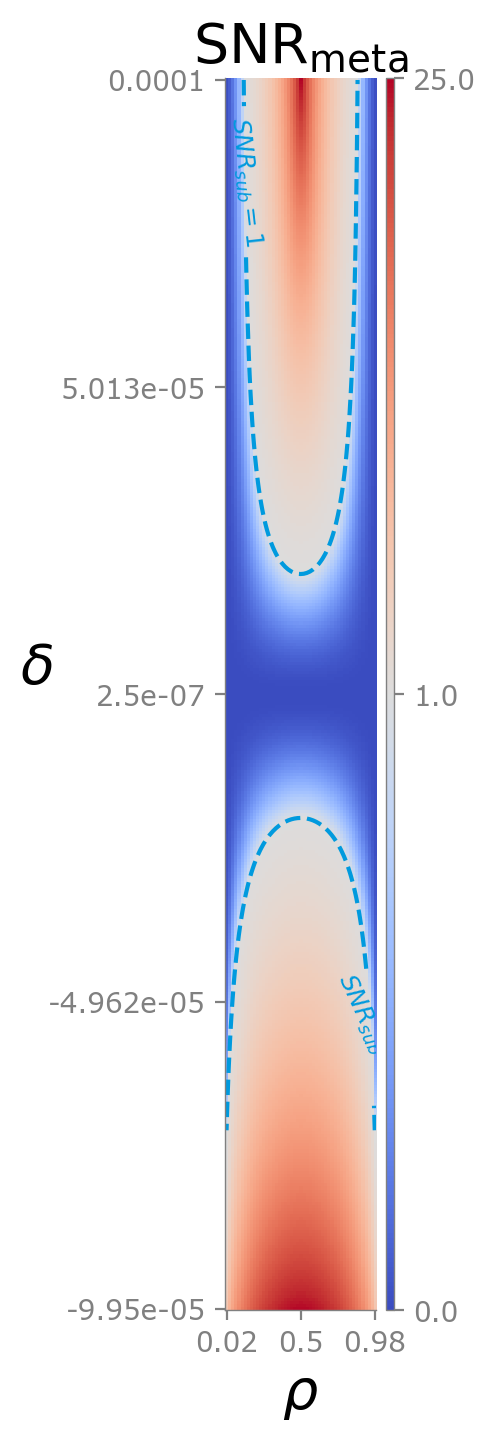

In [19]:
rho = np.setdiff1d(np.around(np.linspace(0, 1, 51), 2), np.array([0, 1]))
# delta = np.setdiff1d(np.around(np.arange(-1, 1, 0.02), 2), np.array([0]))
# print(z)
N = 1000000
X = 2
Z = 1
d = 50  # 100~500
if 0 < d < N/(2*Z):
    min_delta = 2*Z*d /((1-2*Z)*N)
    max_delta = 2*Z*d / N
elif N/(2*Z) <= d < (1-1/(2*Z))*N:
    min_delta = 2*Z*d /((1-2*Z)*N)
    max_delta = (2*Z / (1-2*Z))*(d/N-1)
elif (1-1/(2*Z))*N <= d < N:
    min_delta = 2*Z*(d/N-1)
    max_delta = (2*Z / (1-2*Z))*(d/N-1)
else:
    min_delta, max_delta = None, None
delta = np.setdiff1d(np.around(np.linspace(min_delta, max_delta, int((max_delta-min_delta)/0.0000005)+1), 16), np.array([0, min_delta]))
SNR_m = np.zeros(np.size(delta)*np.size(rho))
SNR_nm = np.zeros(np.size(delta)*np.size(rho))
i = 0
for _rho in rho:
    for _delta in delta:
        if _rho <= 1/2:
            # SNR1
            SNR_nm[i] = N**2 * _delta**2 /(4*Z**2*d)
            SNR_m[i] = (2*Z*d+N*_delta-np.sqrt((2*Z*d-N*_delta)**2+(8*N*Z*d*_delta)*((1-2*_rho)**2)))**2/(8*(2*Z*d+N*_delta+np.sqrt((2*Z*d-N*_delta)**2+(8*N*Z*d*_delta)*((1-2*_rho)**2))))
            i+=1
        elif _rho > 1/2:
            # SNR2
            SNR_nm[i] = N**2 * _delta**2 /(4*Z**2*d)
            SNR_m[i] = (2*Z*d+N*_delta-np.sqrt((2*Z*d-N*_delta)**2+(8*N*Z*d*_delta)*((1-2*_rho)**2)))**2/(8*(2*Z*d+N*_delta+np.sqrt((2*Z*d-N*_delta)**2+(8*N*Z*d*_delta)*((1-2*_rho)**2))))
            i+=1
# print(np.inf in SNR)
# print(rho)
min_snr = min(np.min(SNR_m), np.min(SNR_nm))
max_snr = max(np.max(SNR_m), np.max(SNR_nm))
print(f"Z={Z}, d={d}, min_delta={min_delta}, max_delta={max_delta}")
print("min SNR_m:", np.min(SNR_m))
print("max SNR_m:", np.max(SNR_m))
x = np.repeat(rho, np.size(delta))
y = np.tile(delta, np.size(rho))
save_path = None
# save_path=None
fig = plt.figure(figsize=(8, 8))
widths = [8]
heights = [8]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plot_snrm = color_imshow_2d(x, y, SNR_m, z_center=1, title=r'$\rm SNR_{meta}$', xlabel=r'$\rho$', ylabel=r'$\delta$', min_z=None, max_z=None, save_path=save_path, ax=ax, fig=fig)
plot_snrnm = color_imshow_2d(x, y, SNR_nm, z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR_{sub}=1$'}, color='#009ade', linestyle='dashed')

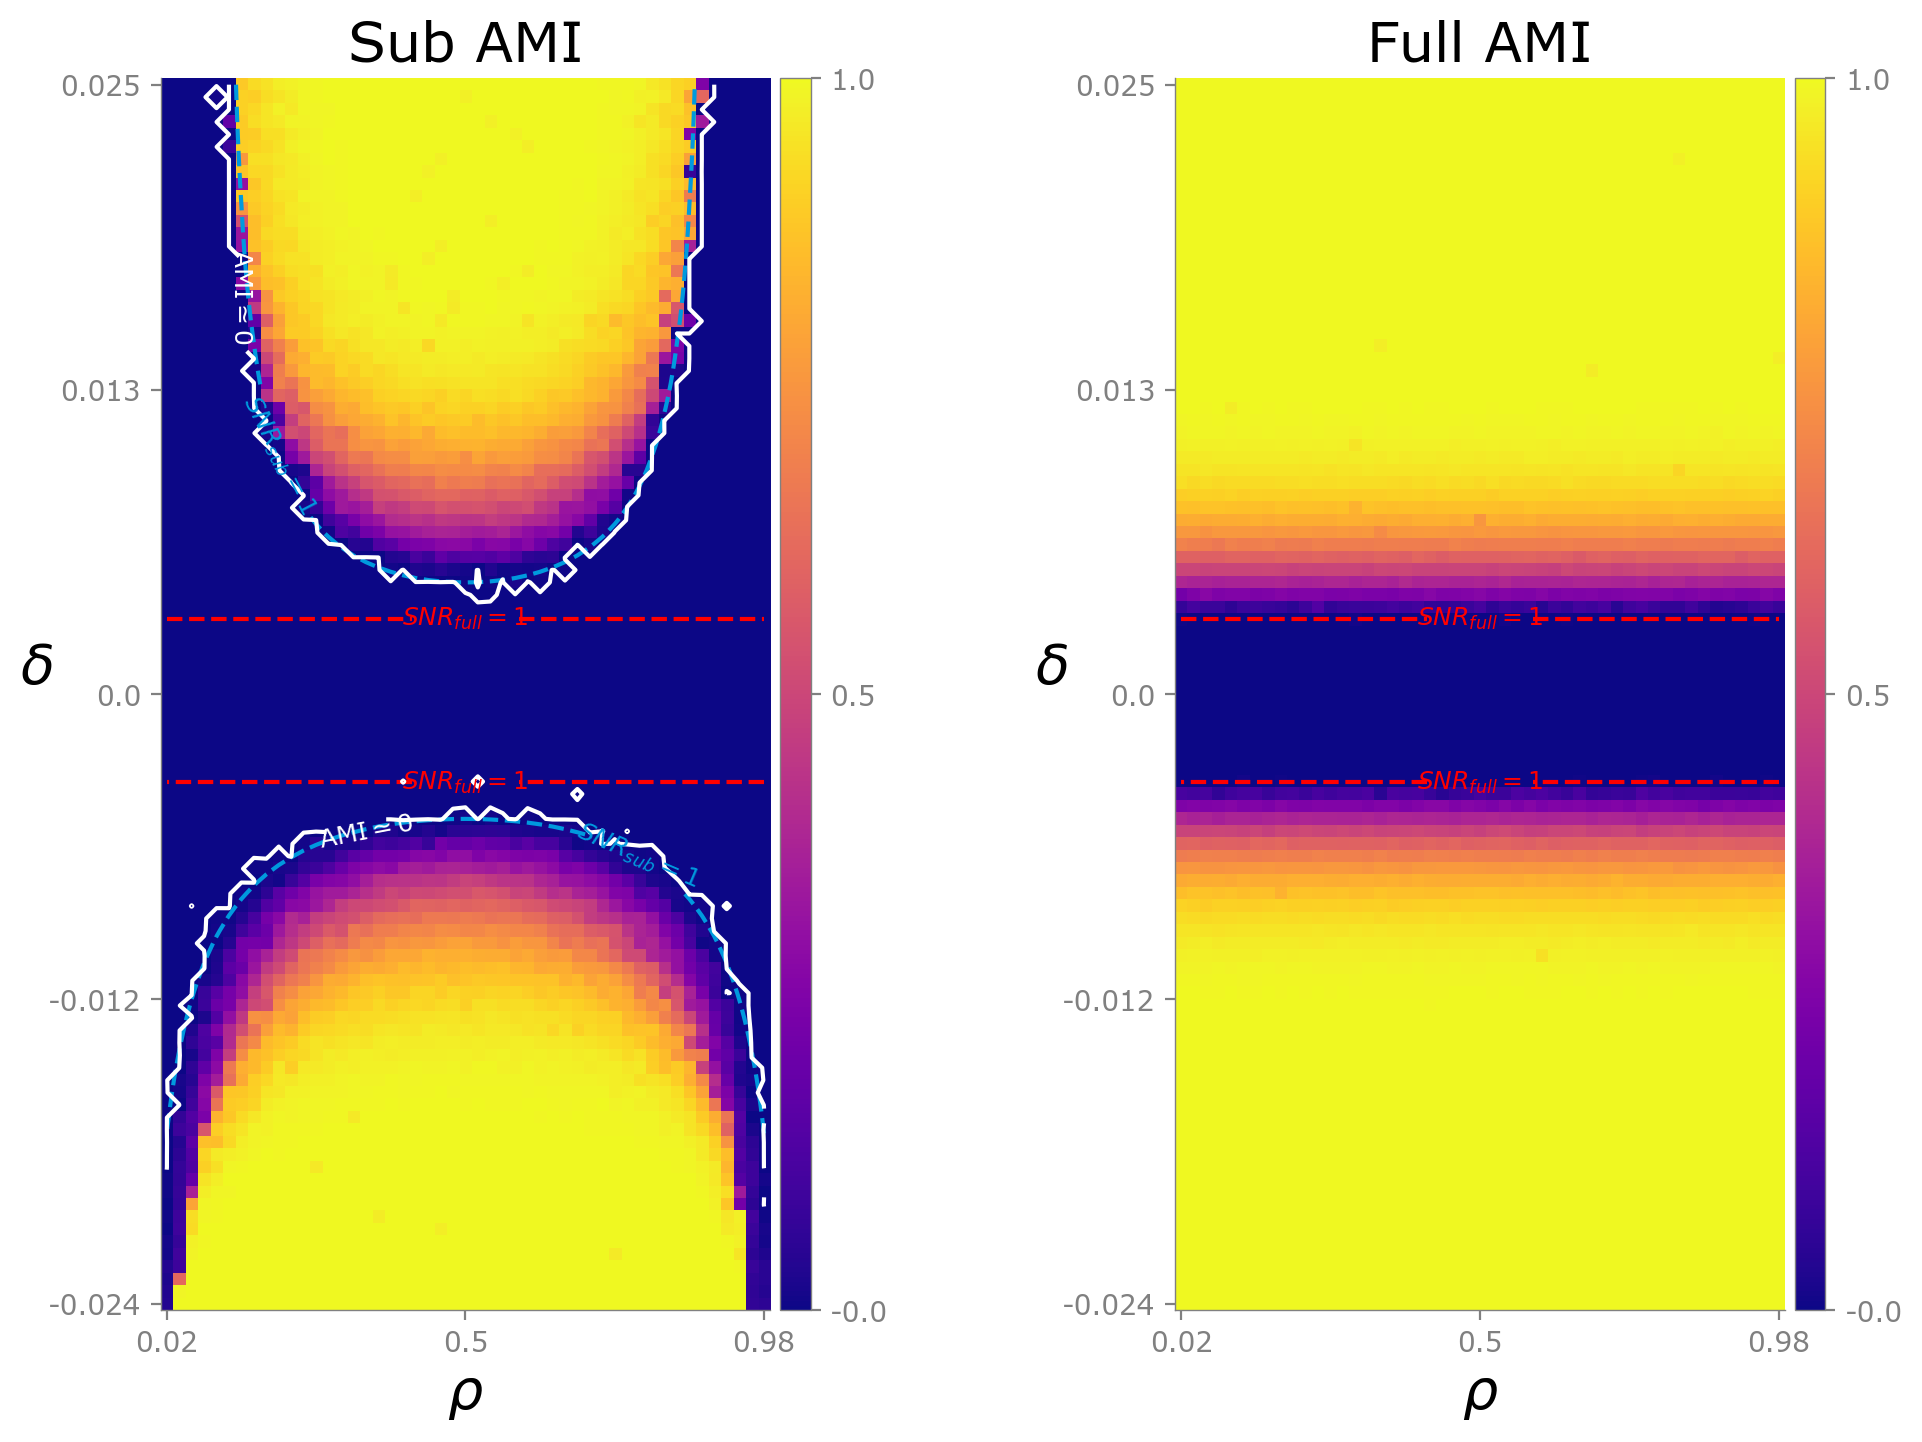

In [5]:
fig = plt.figure(figsize=(12, 8))
widths = [6, 6]
heights = [8]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="Sub AMI", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR_{sub}=1$'}, color='#009ade', linestyle='dashed')
contour_data(plot_snrnm, ax, levels=[1], fmt={1: r'$SNR_{full}=1$'}, color='red', linestyle='dashed')
# amiupper = 0.999
# contour_data(plot_subami, ax, levels=[amiupper], fmt={amiupper: rf'AMI$\simeq$1'}, color='blue')
contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='white')
# plot_snrm = color_imshow_2d(plot_rhos, plot_zs, snr_m, z_center=1, return_gridz=True)
# plot_ch_exact = color_imshow_2d(plot_rhos, plot_zs, SNR_m_exact, z_center=1, return_gridz=True)
# contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR_{sub}=1$'}, color='green')
# contour_data(plot_ch_exact, ax, levels=[1], fmt={1: r'$CH=1$'}, color='red')

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_fullami = color_imshow_2d(plot_rhos, plot_zs, full_ami, z_center=zcenter, title="Full AMI", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig)
contour_data(plot_snrnm, ax, levels=[1], fmt={1: r'$SNR_{full}=1$'}, color='red', linestyle='dashed')
# save_path = "./_Figure/" + fileId + "_noGivenNumGroup" + "_subami" + ".pdf"
# plt.tight_layout()
# plt.savefig(save_path, dpi=600)

# BP

In [3]:
X = 2
Z = 1
n = X * Z * 2000  # 4000 nodes
d = 50
Withsnr = False
givenNumGroup = False
DC = False
oriBP = True
fileId = 'amiExp12.07' + f'_n={n}_X={X}_Z={Z}_d={round(d)}_{"snr" if Withsnr else ""}_' \
                            f'{"givenNumGroup" if givenNumGroup else ""}_' \
                            f'{"oriBP" if oriBP else ""}'
load_path = "./result/detectabilityWithMeta/" + fileId + ".txt"
plot_rhos, plot_zs, full_ami, sub_ami, snr_nm, snr_m, full_num_group, sub_num_group = read_exp(load_path=load_path, Withsnr=Withsnr, givenNumGroup=givenNumGroup, old=False, add_path=None)

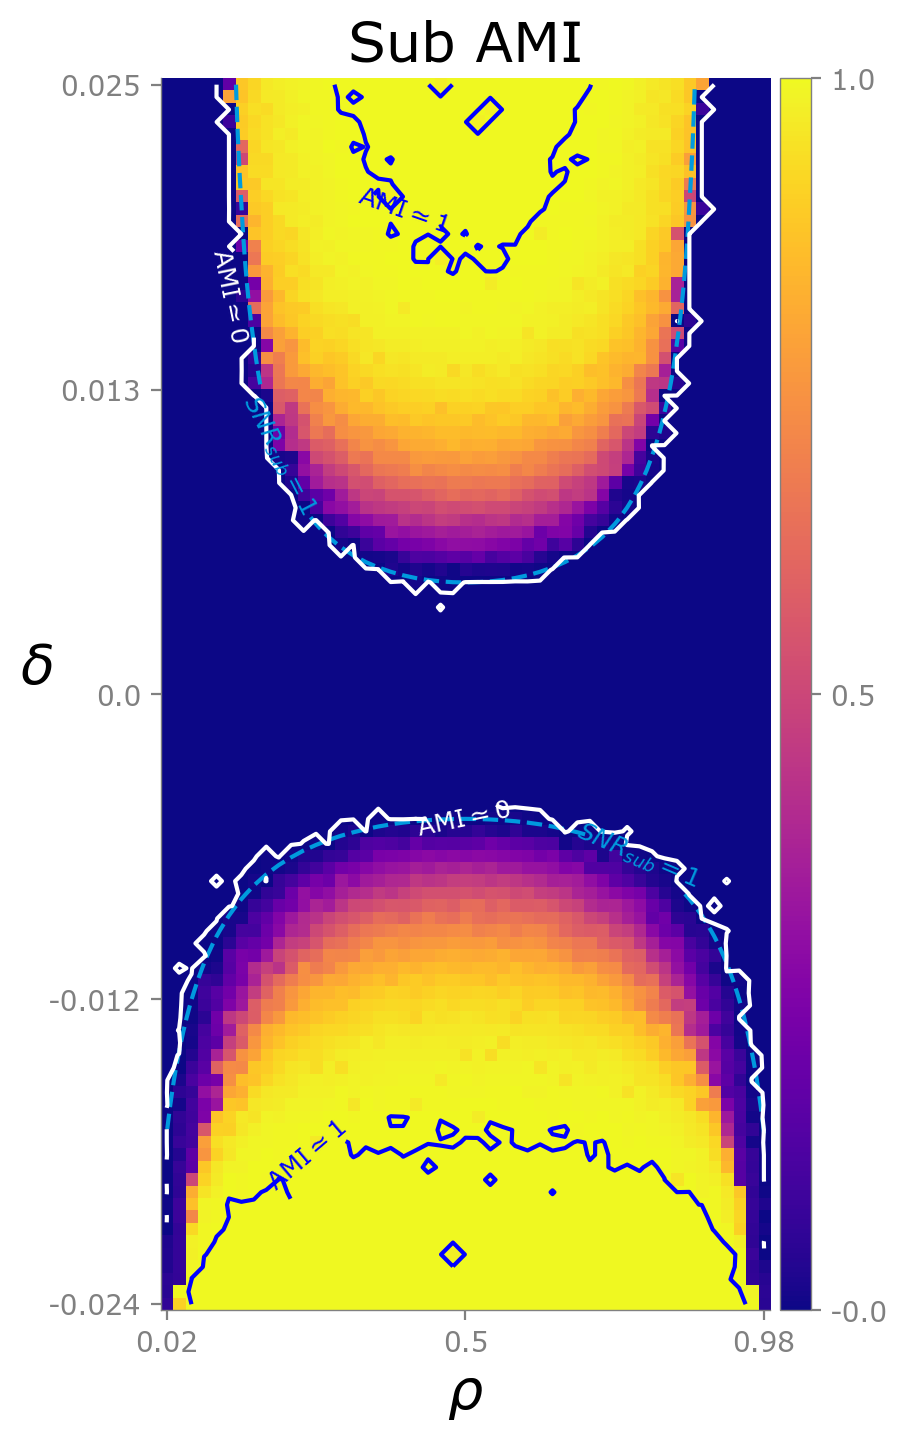

In [6]:
fig = plt.figure(figsize=(12, 8))
widths = [6, 6]
heights = [8]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="Sub AMI", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR_{sub}=1$'}, color='#009ade', linestyle='dashed')
# contour_data(plot_snrnm, ax, levels=[1], fmt={1: r'$SNR_{full}=1$'}, color='red', linestyle='dashed')
amiupper = 0.999
contour_data(plot_subami, ax, levels=[amiupper], fmt={amiupper: rf'AMI$\simeq$1'}, color='blue')
contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='white')
# plot_snrm = color_imshow_2d(plot_rhos, plot_zs, snr_m, z_center=1, return_gridz=True)
# plot_ch_exact = color_imshow_2d(plot_rhos, plot_zs, SNR_m_exact, z_center=1, return_gridz=True)
# contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR_{sub}=1$'}, color='green')
# contour_data(plot_ch_exact, ax, levels=[1], fmt={1: r'$CH=1$'}, color='red')

# row = 0
# col = 1
# ax = fig.add_subplot(spec5[row, col])
# cmap = mpl.colormaps["plasma"]
# zcenter = 0.5
# plot_fullami = color_imshow_2d(plot_rhos, plot_zs, full_ami, z_center=zcenter, title="Full AMI", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig)
# contour_data(plot_snrnm, ax, levels=[1], fmt={1: r'$SNR_{full}=1$'}, color='red', linestyle='dashed')

pin=0.0245, pout=0.0005000000000000004
Metadata generation done!
average degree for sub_0 group is 2.966292134831461, for sub_1 group is 46.54240837696335


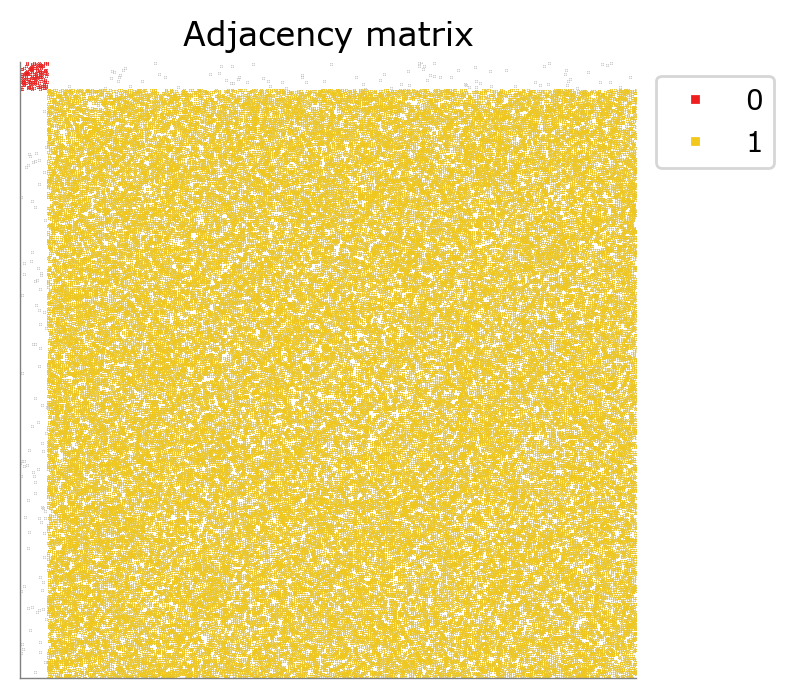

In [19]:
X = 2
Z = 1
n = X*Z*2000
d = 50
min_delta, max_delta = get_range_delta(d, n, X, Z)
rhos = np.setdiff1d(np.around(np.linspace(0, 1, 51), 2), np.array([]))
deltas = np.setdiff1d(np.around(np.linspace(min_delta, max_delta, int((max_delta-min_delta)/0.0005)+1), 5), np.array([0]))
rho = 0.04
delta = 0.024
pin = d / n + delta * (1 - 1 / (X * Z))
pout = d / n - delta / (X * Z)
pin = 0 if pin < 1e-10 else pin
pout = 0 if pout < 1e-10 else pout
print(f'pin={pin}, pout={pout}')
msbm = SymMetaSBM(n, X, Z, rho, pin, pout)
A = msbm.sample()
subA, subGroupId = msbm.filter(A, metaId=0)

fig = plt.figure(figsize=(4, 4))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
c = gen_colors(start=colors_red[0], end=colors_blue[0], n=6)
_, indexes, counts = np.unique(subGroupId, return_index=True, return_counts=True)
counts = counts[np.argsort(indexes)]
plot_block_matrix(subA.toarray(), partition_names=list(range(6)), partition_counts=counts, colors=c, ms=0.01)

index0 = np.where(subGroupId == 0)[0]
index1 = np.where(subGroupId == 1)[0]
d0 = np.sum(subA[index0, :]) / np.size(index0)
d1 = np.sum(subA[index1, :]) / np.size(index1)
print(f'average degree for sub_0 group is {d0}, for sub_1 group is {d1}')